<a href="https://colab.research.google.com/github/Vanjula/Predicting_Customer_Churn/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load dataset from local upload
from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('telecom_churn_dataset.csv')

# Basic data exploration
df.info()
df.describe()
df.isnull().sum()


Saving telecom_churn_dataset.csv to telecom_churn_dataset.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        5000 non-null   int64  
 1   Gender            5000 non-null   object 
 2   Age               5000 non-null   int64  
 3   Tenure            5000 non-null   int64  
 4   ServiceType       5000 non-null   object 
 5   MonthlyCharges    5000 non-null   float64
 6   TotalCharges      5000 non-null   float64
 7   PaymentMethod     5000 non-null   object 
 8   ContractType      5000 non-null   object 
 9   InternetService   5000 non-null   object 
 10  OnlineSecurity    5000 non-null   object 
 11  DeviceProtection  5000 non-null   object 
 12  TechSupport       5000 non-null   object 
 13  StreamingTV       5000 non-null   object 
 14  StreamingMovies   5000 non-null   object 
 15  Churn             5000 non-

,0
CustomerID,0
Gender,0
Age,0
Tenure,0
ServiceType,0
MonthlyCharges,0
TotalCharges,0
PaymentMethod,0
ContractType,0
InternetService,0


In [2]:
# Handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values for numerical columns only
df[['Tenure', 'MonthlyCharges', 'TotalCharges']] = df[['Tenure', 'MonthlyCharges', 'TotalCharges']].fillna(df[['Tenure', 'MonthlyCharges', 'TotalCharges']].mean())

# Fill missing values for 'Gender' using mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# Convert categorical columns using one-hot encoding
df_encoded = pd.get_dummies(df, columns=[
    'Gender', 'ServiceType', 'PaymentMethod', 'ContractType', 'InternetService',
    'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
], drop_first=True)


<ipython-input-2-32d8c7a8aeac>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Feature scaling
scaler = StandardScaler()
numerical_columns = ['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges']
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Split the data
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Churn
Yes    2516
No     2484
Name: count, dtype: int64


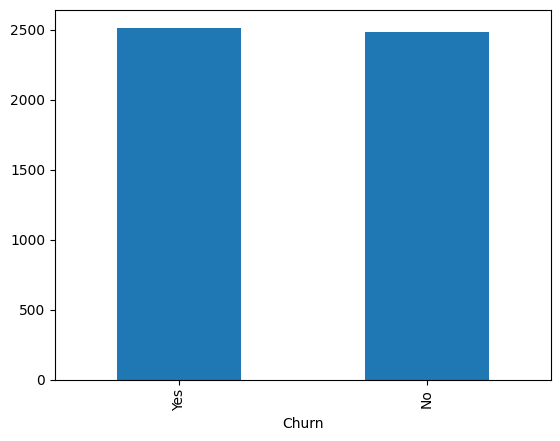

In [4]:
# Check class distribution
df['Churn'].value_counts().plot(kind='bar')
print(df['Churn'].value_counts())


In [6]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"AUC-ROC: {roc_auc}")

Accuracy: 0.518
Precision: 0.5298651252408478
Recall: 0.5360623781676414
F1-Score: 0.5329457364341085
AUC-ROC: 0.5175178420612334
